# Reduced Quantum Genetic Algorithm With Multiple generations

In [19]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
from collections import Counter
import numpy as np

Lets init our circuit and put each qubit in superposition and in a random state :

[0.09233104 0.14663716 0.50350633 0.28849589 0.47838186 0.2591673 ]


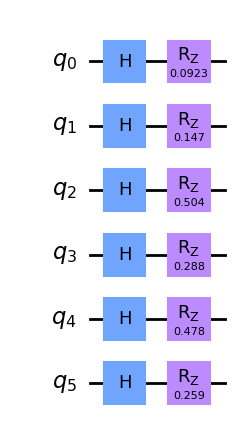

In [20]:
n = 6

circuit = QuantumCircuit(n)
circuit.h(range(n))
rand_theta = np.random.uniform(0, 2*np.pi/n, n)
print(rand_theta)
for i in range(n):
    circuit.rz(rand_theta[i], i)

circuit.draw(output = "mpl")

Now let's make a Grover Algorithm
First we need to create an Oracle that change state of the expected value

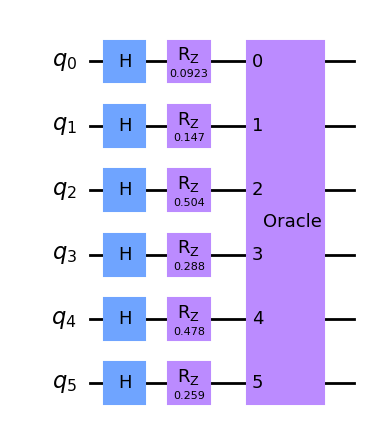

In [21]:
expected = 8

oracle = np.identity(2**n)
oracle[expected][expected] = -1

circuit.unitary(oracle, range(n), label='Oracle')
circuit.draw(output = "mpl")

Now we can add the Grover Inverse

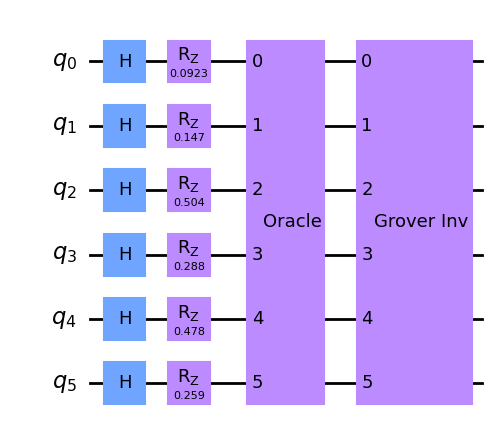

In [22]:
def ia(size):
    ia_mat=2*np.ones(size)/size
    ia_mat=ia_mat-np.identity(size)
    return ia_mat
GIM = ia(2**n)
circuit.unitary(GIM,range(n), label='Grover Inv')

circuit.draw(output = "mpl")

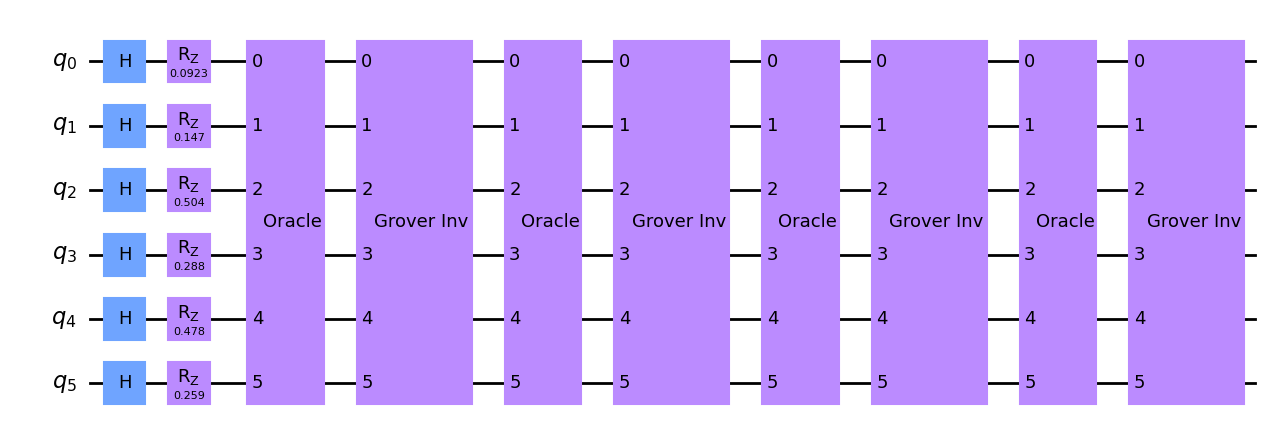

In [23]:
generations = 3

for _ in range(generations):
    circuit.unitary(oracle, range(n), label='Oracle')
    circuit.unitary(GIM,range(n), label='Grover Inv')

circuit.draw(output = "mpl")

And finally we measure all qubits from our circuit multiple time to get some probabilities

In [24]:
circuit.measure_all()

Counter({'001000': 6809, '111100': 97, '111101': 94, '011110': 93, '111111': 85, '111110': 75, '011111': 74, '100000': 68, '000000': 68, '000010': 67, '011101': 67, '110111': 67, '011100': 64, '111011': 63, '110101': 62, '000011': 60, '101101': 59, '111010': 58, '100001': 56, '100011': 56, '011010': 56, '101110': 55, '110110': 54, '001111': 53, '101111': 52, '010011': 52, '101100': 51, '010000': 51, '010111': 50, '110100': 50, '111001': 49, '011001': 48, '001100': 48, '011011': 48, '100101': 47, '000001': 46, '010110': 46, '001001': 45, '000110': 43, '110000': 43, '101001': 42, '110011': 42, '100010': 41, '011000': 40, '001101': 40, '000111': 40, '101000': 40, '010101': 39, '001010': 37, '100110': 37, '001011': 37, '111000': 37, '100111': 37, '110010': 36, '001110': 36, '000100': 36, '010010': 36, '000101': 35, '101010': 35, '010001': 33, '110001': 32, '100100': 31, '101011': 27, '010100': 25})


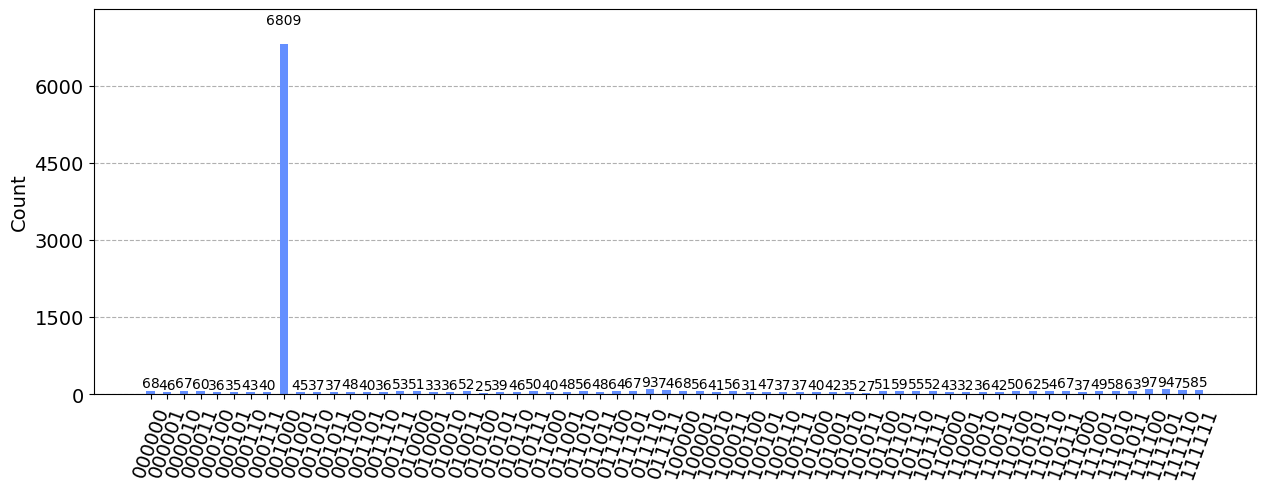

In [25]:
sim = Aer.get_backend('qasm_simulator')
result = Counter(execute(circuit,backend=sim,shots=10000).result().get_counts())
print(result)
plot_histogram(result, figsize=(15, 5))